<a href="https://colab.research.google.com/github/Immaczx/ModeladoySimulacion/blob/main/BDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BDF (Backward differentiation formulas)

BDF son formulas que dan una aproximación a la deribada de una funcion y un tiempo dados utilizando información en puntos de tiempo ya calculados.

Se utiliza un BDF para obtener una aproximación numérica a la ecuación diferencial:
\begin{equation}
y'=f(t,y)
\end{equation}
Derivando el lado izquierdo obtenemos el backward Euler method
\begin{equation}
y_n=y_{n-1}+(t_n-t_{n-1})f(y_n,t_n)
\end{equation}
si $y_{n-1}$ es conocido, la ecuación anterior es implícita en $y_n$.

Para metodos de orden superior para mayor simplicidad se usa un tamaño de paso $h$ constante, es decir $h$ es independiente de $n$, algunas versiones implementan un tamaño de paso variable (y orden variable) de estos métodos.

El polinomio de grado $k$ interpolado puede ser escrito usando Backward differences como:
\begin{equation}
y(t)\approx y_n+\frac{1}{h}(t-t_n)\nabla y_n+\frac{1}{2h^2}(t-t_n)(t-t_{n-1}){\nabla}^2 y_n+...+\frac{1}{h^kk!}(t-t_n)...(t-t_{n-k+1}){\nabla}^k y_n
\end{equation}
La formula tiene la forma de:
\begin{equation}
hy'_n=
{
\sum_{j=0}^{k} \alpha_{kj}y_{n-j}
}
\end{equation}

Donde $h$ es el tamaño del paso. 

Los coeficientes $\alpha_{kj}$ se eligen para que el método alcance el orden $k$, que es el máximo posible. 

Los métodos con $s > 6$ no son estables a cero, por lo que no se pueden utilizar. 

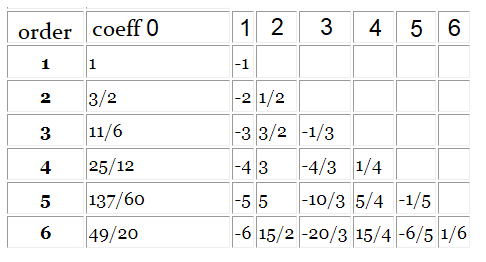

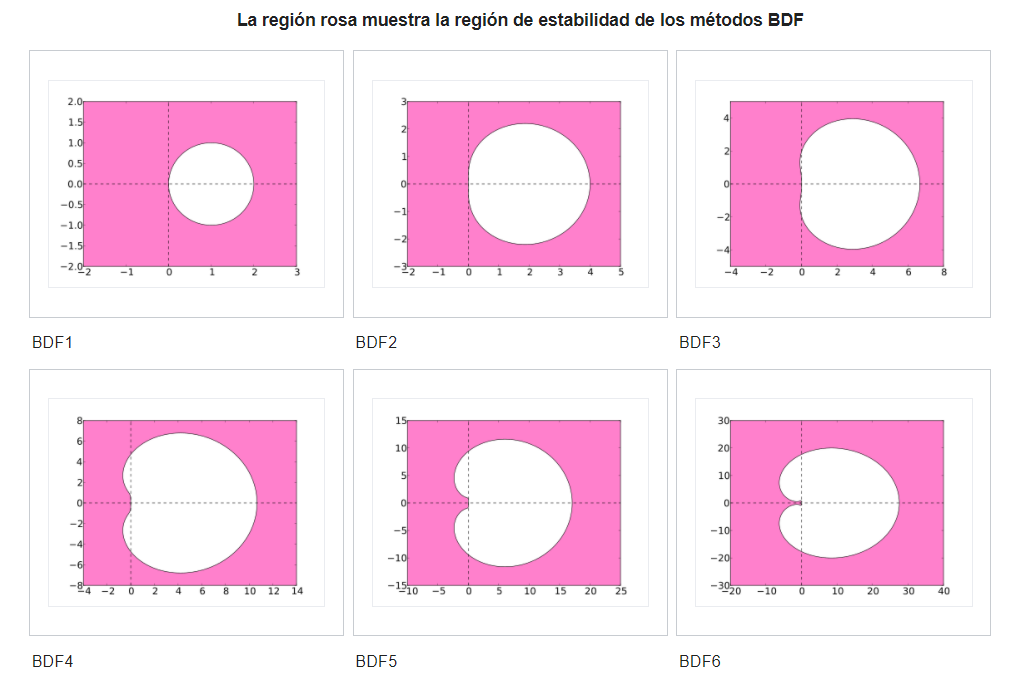

Las regiones estables son el exterior de los contornos indicados.

Estos seis métodos son estables a lo largo de todo el eje real negativo, lo que los hace adecuados para ecuaciones rígidas. El contorno del método BDF de orden 7 cruza el eje real negativo, por lo que éste y cualquier método BDF de orden superior son inestables.

In [ ]:
def newton(x_old, t_new, dt, precision=1e-12):
    """ Toma los valores de  x_old y t_new, y encuentra la raiz de
    la funcion f(x_new), retorna x_new. """
    
    # Primera estimación:
    x_new = x_old
    f = func(x_new, x_old, t_new, dt)
    dfdx = dfuncdx(x_new, dt)
    
    while abs(f/dfdx) > precision:
        x_new = x_new - f/dfdx
        f = func(x_new, x_old, t_new, dt)
        dfdx = dfuncdx(x_new, dt)
        
    return x_new
    
def func(x_new, x_old, t_new, dt):
    """ Definimos la función f(x) ."""
    return x_new - x_old - dt*(np.cos(x_new) + np.sin(t_new))

def dfuncdx(x_new, dt):
    """ Derivada de f(x) con respecto a x_new."""
    return 1+dt*np.sin(x_new)

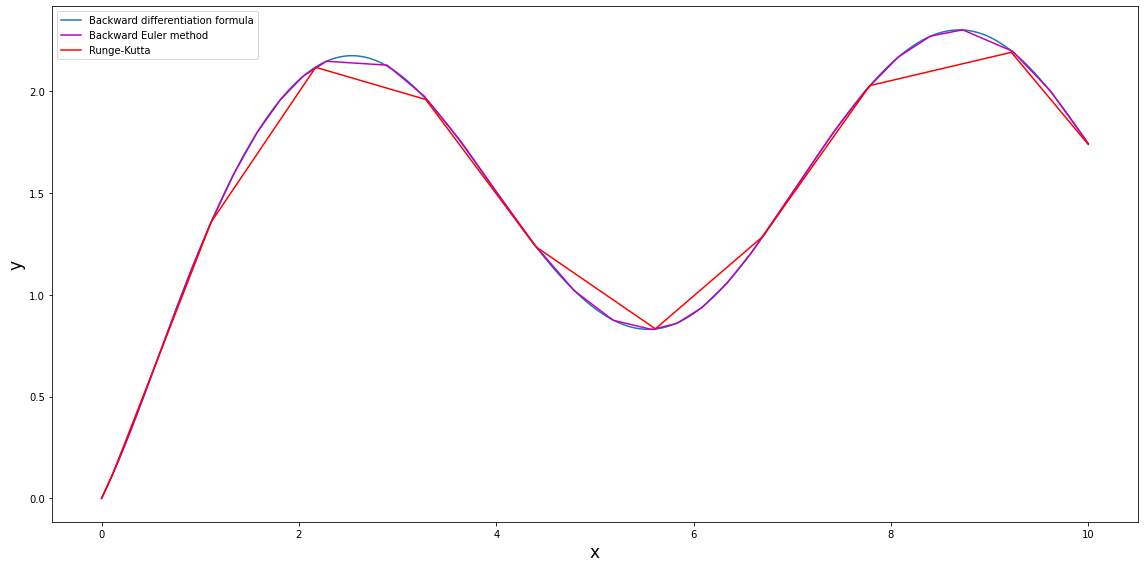

In [ ]:
# https://es.qaz.wiki/wiki/Stiff_equation
"""
Backward differentiation formulas
"""
# http://www.scholarpedia.org/article/Backward_differentiation_formulas
# http://people.bu.edu/andasari/courses/numericalpython/python.html
# https://colab.research.google.com/github/MarioBolanos/Modelado-y-Simulacion/blob/master/M%C3%A9todo_de_Euler_Impl%C3%ADcito_Unal.ipynb
# https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/implicit_euler.ipynb
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.BDF.html



# https://www.math.ubc.ca/~pwalls/math-python/differentiation/differentiation/
# scientific libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.integrate import solve_ivp


def myFunc(t, Y):
    y=Y
    dy = np.cos(y) + np.sin(t)
    return dy

dt = 0.001  # Tamaño de paso
t_max = 10  # Tiempo Máximo
N = int(t_max/dt)

te = np.linspace(0, t_max, N+1)
xe = np.zeros(N+1)

# Valor inicial
xe[0] = 0

for n in range(N):
    xe[n+1] = newton(xe[n], te[n+1], dt)

x = np.array([0.0, 10.0])
Y0 = np.array([0])

NumSol = solve_ivp(myFunc, x, Y0, method="BDF")

tBDF = NumSol.t
yBDF = NumSol.y

NumSol = solve_ivp(myFunc, x, Y0, method="RK45")
tRK = NumSol.t
yRK = NumSol.y

fig = plt.figure(figsize=(16,8))
plt.plot(te,xe)
plt.plot(tBDF, yBDF.T, 'm')
plt.plot(tRK, yRK.T, 'r')

plt.legend(["Backward differentiation formula","Backward Euler method",
            "Runge-Kutta"], loc=2)
plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17)
plt.tight_layout()
plt.show()

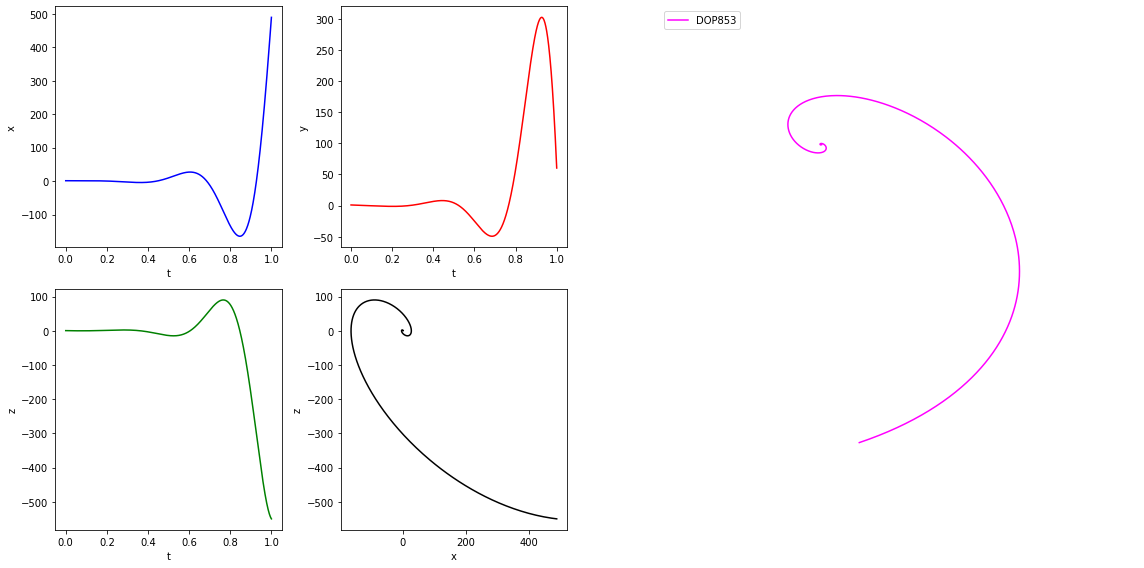

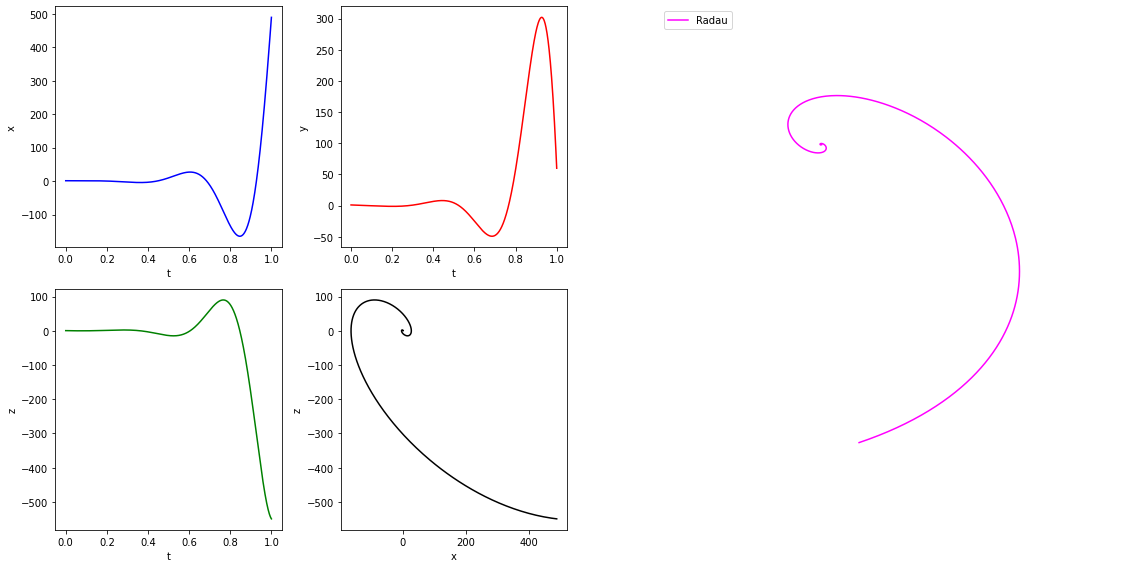

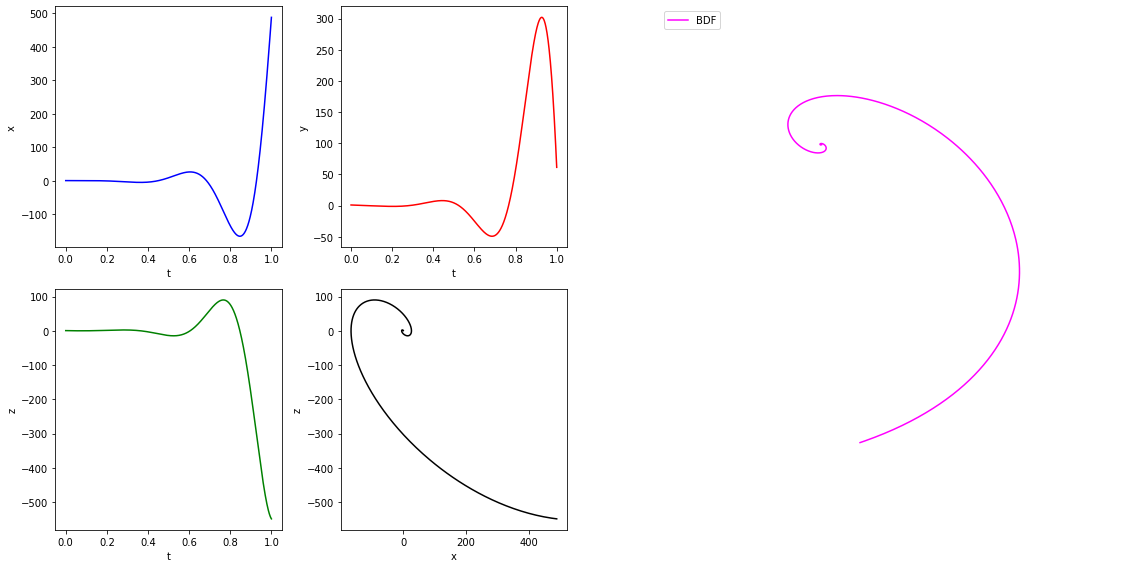

In [ ]:
# scientific libraries

def myFunc(t,Y):
    x, y, z = Y;
    dx = -15*z
    dy = -15*x
    dz = -15*y
    return [dx, dy, dz]
# Time span and inital conditions
Y0 = [ 1, 1, 0.5]

# Numerical algorithm/method
Metodos = ["DOP853","Radau","BDF"]
te=np.linspace(0,1,1000)
for metodo in Metodos:
  NumSol = solve_ivp(myFunc, [0, 1], Y0, method=metodo,t_eval=te)
  x, y, z = NumSol.y
  t = NumSol.t

  fig = plt.figure(figsize=(16,8))
  ax = fig.add_subplot(1, 2, 2, projection='3d')
  ax = fig.gca(projection='3d')
  ax.view_init(20, 0)
  ax.set_axis_off()
  ax.plot(x,y,z,'magenta')
  ax.legend([metodo], loc=2)
  plt.subplot(241);
  plt.plot(t,x,'b'); plt.xlabel("t"); plt.ylabel("x");
  plt.subplot(242);
  plt.plot(t,y,'r'); plt.xlabel("t"); plt.ylabel("y");
  plt.subplot(245);
  plt.plot(t,z,'g'); plt.xlabel("t"); plt.ylabel("z");
  plt.subplot(246);
  plt.plot(x,z,'k'); plt.xlabel("x"); plt.ylabel("z");
  plt.tight_layout();

  plt.show()
